In [1]:
from PIL import Image, ImageTk
from PIL.ExifTags import TAGS
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import const
from tqdm import tqdm

Calcul des moyennes: 100%|██████████| 520/520 [01:12<00:00,  7.18it/s]


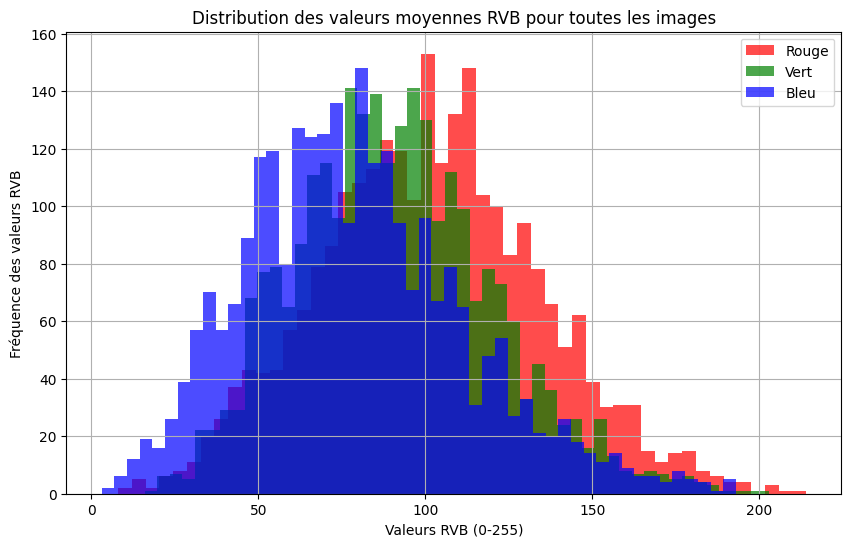

In [8]:
df = pd.read_csv(os.path.join(const.DATA_PATH, "image_cleaned_ref.csv"))
especes_oiseaux = set(df['birdName'])

mean_by_bird_r, mean_by_bird_g, mean_by_bird_b = [], [], []

for oiseau in tqdm(especes_oiseaux, "Calcul des moyennes"):
    for image_nom  in os.listdir(os.path.join(const.DATASET_CLEAN_PATH_WO_BG ,"test", oiseau)):
        image_path = os.path.join(const.DATASET_CLEAN_PATH_WO_BG ,"test", oiseau, image_nom)
        image = Image.open(image_path)
        image_rgb = image.convert('RGB')
        r_total, g_total, b_total, count = 0, 0, 0, 0
        for x in range(image.width):
            for y in range(image.height):
                r, g, b = image_rgb.getpixel((x, y))
                if (r, g, b) != (0, 0, 0):  
                    r_total += r
                    g_total += g
                    b_total += b
                    count += 1
        if count > 0:  
            r_avg = r_total // count
            g_avg = g_total // count
            b_avg = b_total // count
            mean_by_bird_r.append(r_avg)
            mean_by_bird_g.append(g_avg)
            mean_by_bird_b.append(b_avg)

# histogramme
plt.figure(figsize=(10, 6))
plt.title("Distribution des valeurs moyennes RVB pour toutes les images")
plt.xlabel("Valeurs RVB (0-255)")
plt.ylabel("Fréquence des valeurs RVB")
plt.hist(mean_by_bird_r, bins=50, alpha=0.7, color='red', label='Rouge')
plt.hist(mean_by_bird_g, bins=50, alpha=0.7, color='green', label='Vert')
plt.hist(mean_by_bird_b, bins=50, alpha=0.7, color='blue', label='Bleu')
plt.legend()
plt.grid(True)
plt.show()


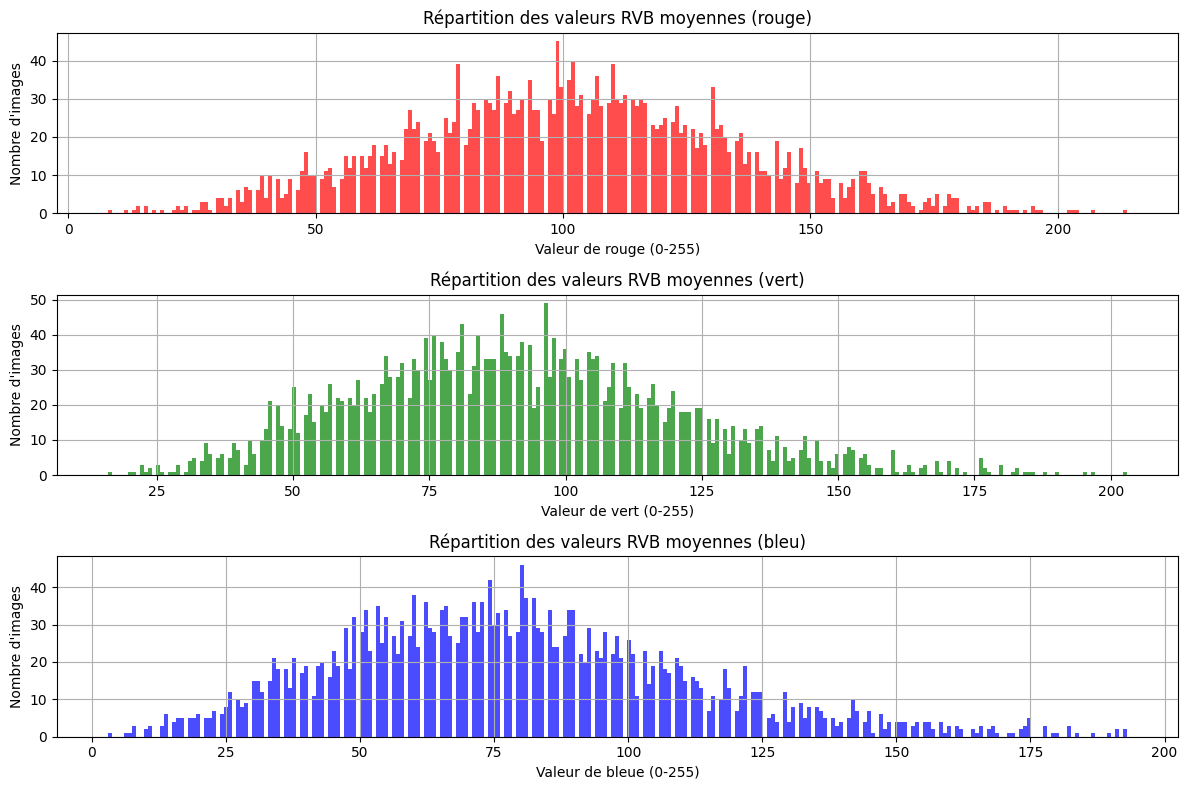

In [9]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.hist([r for r in mean_by_bird_r if r != 0], bins=255, alpha=0.7, color='red', label='Rouge')
plt.title("Répartition des valeurs RVB moyennes (rouge)")
plt.xlabel("Valeur de rouge (0-255)")
plt.ylabel("Nombre d'images")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.hist([g for g in mean_by_bird_g if g != 0], bins=255, alpha=0.7, color='green', label='Vert')
plt.title("Répartition des valeurs RVB moyennes (vert)")
plt.xlabel("Valeur de vert (0-255)")
plt.ylabel("Nombre d'images")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.hist([b for b in mean_by_bird_b if b != 0], bins=255, alpha=0.7, color='blue', label='Bleu')
plt.title("Répartition des valeurs RVB moyennes (bleu)")
plt.xlabel("Valeur de bleue (0-255)")
plt.ylabel("Nombre d'images")
plt.grid(True)

plt.tight_layout()
plt.show()


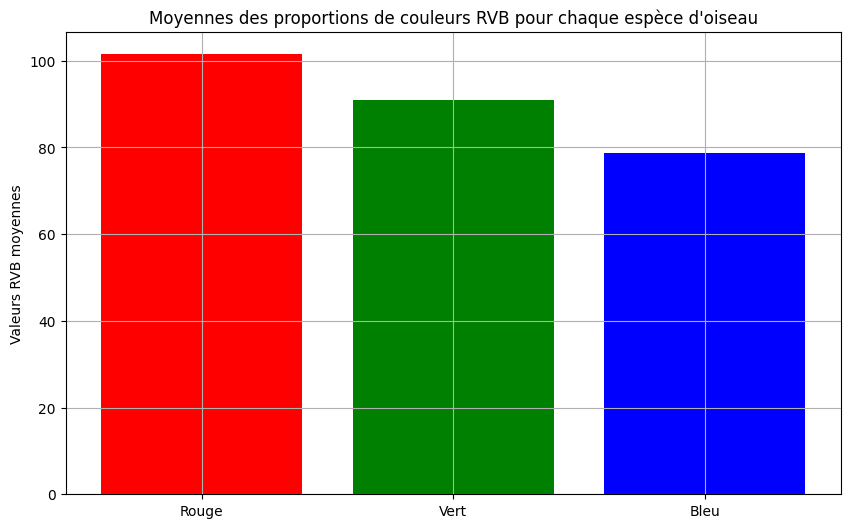

In [11]:
# moyennes RVB
all_bird_mean_r = np.mean([r for r in mean_by_bird_r if r != 0])
all_bird_mean_g = np.mean([g for g in mean_by_bird_g if g != 0])
all_bird_mean_b = np.mean([b for b in mean_by_bird_b if b != 0])

plt.figure(figsize=(10, 6))
plt.title("Moyennes des proportions de couleurs RVB pour chaque espèce d'oiseau")
plt.ylabel("Valeurs RVB moyennes")
plt.bar(['Rouge', 'Vert', 'Bleu'], [all_bird_mean_r, all_bird_mean_g, all_bird_mean_b], color=['red', 'green', 'blue'])
plt.grid(True)
plt.show()


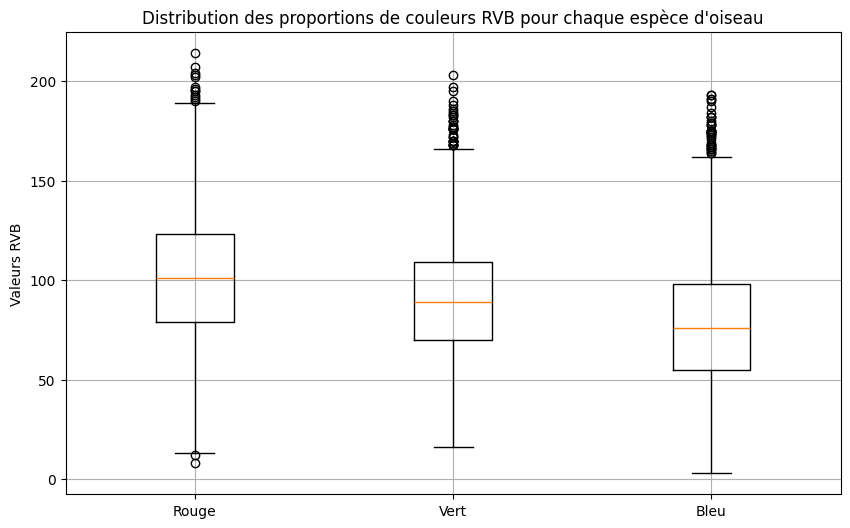

In [12]:
# boîte à moustaches
plt.figure(figsize=(10, 6))
plt.title("Distribution des proportions de couleurs RVB pour chaque espèce d'oiseau")
plt.ylabel("Valeurs RVB")
plt.boxplot([mean_by_bird_r, mean_by_bird_g, mean_by_bird_b], labels=['Rouge', 'Vert', 'Bleu'])
plt.grid(True)
plt.show()


In [13]:
from ipywidgets import interact_manual, widgets

# on analyse le RVB pour chaque espèce d'oiseau
def get_rgb_data(espece):
    mean_r, mean_g, mean_b = [], [], []
    try:
        for image_nom in os.listdir(os.path.join(const.DATASET_CLEAN_PATH_WO_BG,"test", espece)):
            image_path = os.path.join(const.DATASET_CLEAN_PATH_WO_BG,"test", espece, image_nom)
            image = Image.open(image_path)
            image_rgb = image.convert('RGB')
            r_total, g_total, b_total, count = 0, 0, 0, 0
            for x in range(image.width):
                for y in range(image.height):
                    r, g, b = image_rgb.getpixel((x, y))
                    if (r, g, b) != (0, 0, 0): 
                        r_total += r
                        g_total += g
                        b_total += b
                        count += 1
            if count > 0: 
                r_avg = r_total // count
                g_avg = g_total // count
                b_avg = b_total // count
                mean_r.append(r_avg)
                mean_g.append(g_avg)
                mean_b.append(b_avg)
    except Exception as e:
        print(f"An error occurred: {e}")
    return mean_r, mean_g, mean_b

# calcul des pourcentages RVB
def calculate_rgb_percentages(espece):
    mean_r, mean_g, mean_b = get_rgb_data(espece)
    total = sum(mean_r) + sum(mean_g) + sum(mean_b)
    if total > 0:  # avoid division by zero
        r_percentage = sum(mean_r) / total * 100
        g_percentage = sum(mean_g) / total * 100
        b_percentage = sum(mean_b) / total * 100
        print(f"Pour l'espèce {espece}, les pourcentages des couleurs RVB sont :")
        print(f"Rouge : {r_percentage:.2f}%")
        print(f"Vert : {g_percentage:.2f}%")
        print(f"Bleu : {b_percentage:.2f}%")


interact_manual(calculate_rgb_percentages, espece=widgets.Dropdown(options=especes_oiseaux, description="Espèce d'oiseau:"));


interactive(children=(Dropdown(description="Espèce d'oiseau:", options=('INDIAN BUSTARD', 'EASTERN GOLDEN WEAV…

Calcul de toutes les moyennes: 100%|██████████| 520/520 [00:48<00:00, 10.72it/s]


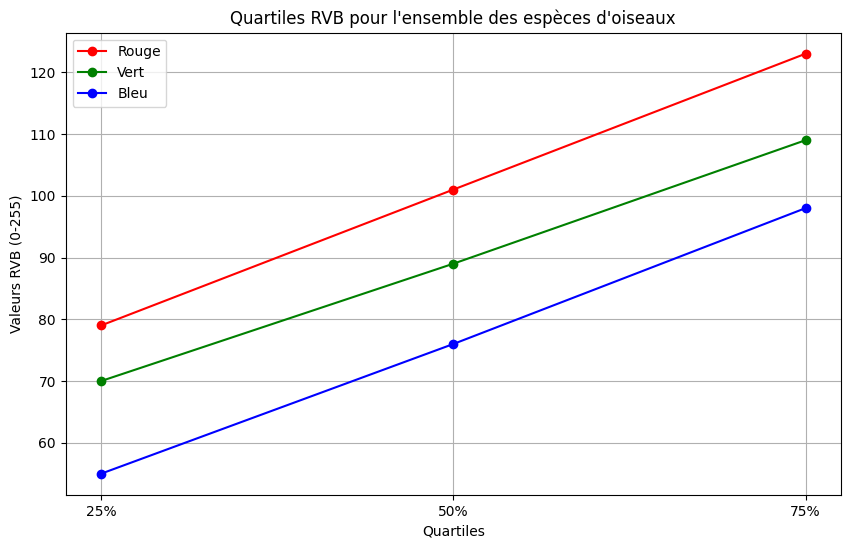

In [14]:
all_mean_r, all_mean_g, all_mean_b = [], [], []

for oiseau in tqdm(especes_oiseaux, "Calcul de toutes les moyennes"):
    mean_by_bird_r, mean_by_bird_g, mean_by_bird_b = get_rgb_data(oiseau)
    all_mean_r.extend([r for r in mean_by_bird_r if r != 0])
    all_mean_g.extend([g for g in mean_by_bird_g if g != 0])
    all_mean_b.extend([b for b in mean_by_bird_b if b != 0])

# graphique des quantiles
fig, ax = plt.subplots(figsize=(10, 6))

# quantiles pour la couleur rouge
quartile_r = [np.percentile(all_mean_r, 25), np.percentile(all_mean_r, 50), np.percentile(all_mean_r, 75)]
ax.plot(quartile_r, color='red', marker='o', label='Rouge')

# quantiles pour la couleur verte
quartile_g = [np.percentile(all_mean_g, 25), np.percentile(all_mean_g, 50), np.percentile(all_mean_g, 75)]
ax.plot(quartile_g, color='green', marker='o', label='Vert')

# quantiles pour la couleur bleue
quartile_b = [np.percentile(all_mean_b, 25), np.percentile(all_mean_b, 50), np.percentile(all_mean_b, 75)]
ax.plot(quartile_b, color='blue', marker='o', label='Bleu')

ax.set_xticks(range(3))
ax.set_xticklabels(['25%', '50%', '75%'])
ax.set_title("Quartiles RVB pour l'ensemble des espèces d'oiseaux")
ax.set_xlabel("Quartiles")
ax.set_ylabel("Valeurs RVB (0-255)")
ax.legend()

plt.grid(True)
plt.show()


In [15]:
rgb_values = {espece: get_rgb_data(espece) for espece in especes_oiseaux}

# détermination de l'espèce avec le plus de rouge, de vert et de bleu
max_r = max(rgb_values, key=lambda x: np.mean([r for r in rgb_values[x][0] if r != 0]) if rgb_values[x][0] else 0)
max_g = max(rgb_values, key=lambda x: np.mean([g for g in rgb_values[x][1] if g != 0]) if rgb_values[x][1] else 0)
max_b = max(rgb_values, key=lambda x: np.mean([b for b in rgb_values[x][2] if b != 0]) if rgb_values[x][2] else 0)

print(f"L'espèce avec le plus de rouge est : {max_r}")
print(f"L'espèce avec le plus de vert est : {max_g}")
print(f"L'espèce avec le plus de bleu est : {max_b}")


L'espèce avec le plus de rouge est : FLAME BOWERBIRD
L'espèce avec le plus de vert est : TRUMPTER SWAN
L'espèce avec le plus de bleu est : IVORY GULL
